In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

# Loading and exploring

In [717]:
train = pd.read_csv('loan_train.csv')
test  = pd.read_csv('loan_test.csv')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [718]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


### The goal here to predict the Pay off the loan status using the other information's

In [719]:
train.shape, test.shape

((614, 12), (367, 11))

In [720]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [721]:
train.isnull().sum().sort_values(ascending=False)

Credit_History        50
Self_Employed         32
Dependents            15
Term                  14
Gender                13
Married                3
Education              0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Area                   0
Status                 0
dtype: int64

#### We have some null values that we have to deal with


In [722]:
train.describe().round(1)

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,614.0,614.0,614.0,600.0,564.0
mean,540345.9,162124.6,14141042.3,342.0,0.8
std,610904.2,292624.8,8815682.5,65.1,0.4
min,15000.0,0.0,0.0,12.0,0.0
25%,287750.0,0.0,9800000.0,360.0,1.0
50%,381250.0,118850.0,12500000.0,360.0,1.0
75%,579500.0,229725.0,16475000.0,360.0,1.0
max,8100000.0,4166700.0,70000000.0,480.0,1.0


In [723]:
train.isnull().sum(axis=1).sort_values(ascending=False)

435    2
600    2
411    2
335    2
236    2
      ..
215    0
214    0
213    0
212    0
613    0
Length: 614, dtype: int64

#### in the worst case row will have 2 null values

# Cleaning 

##### I think Credit History and employ state will be the most important features so let's handel them first 
###### i will drop Credit History and fill the employ state with the mode

In [724]:
train.dropna(subset = ['Credit_History'],inplace=True)
test.dropna(subset = ['Credit_History'],inplace=True)

self_employed_mode = train['Self_Employed'].mode()
train['Self_Employed'].fillna(self_employed_mode[0], inplace=True)
test['Self_Employed'].fillna(self_employed_mode[0], inplace=True)

In [725]:
train.isnull().sum().sort_values(ascending=False)

Dependents            15
Term                  14
Gender                12
Married                3
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Credit_History         0
Area                   0
Status                 0
dtype: int64

### Gender

In [726]:
train['Gender'].value_counts()

Male      451
Female    101
Name: Gender, dtype: int64

In [727]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

##### we have 2 options here we can just drop that 13 rows or we can fill the null with the mode, i will pick the second option cause i think that gender won't affect  our predation that much and our data is small we need to make the dropping our last option

In [728]:
train['Gender'].fillna('Male', inplace=True)
test['Gender'].fillna('Male', inplace=True)

In [729]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Dependents & Married

##### The two columns have small null rate, i will fill them with the mode, "since the mean will give float it will be a bad choice to fill with, the Median will be good choice too but let's go with the mode"

In [730]:
dependents_mode = train['Dependents'].mode()
train['Dependents'].fillna(dependents_mode[0], inplace=True)
test['Dependents'].fillna(dependents_mode[0], inplace=True)

Married_mode = train['Married'].mode()
train['Married'].fillna(Married_mode[0], inplace=True)
test['Married'].fillna(Married_mode[0], inplace=True)

In [731]:
train.isnull().sum().sort_values(ascending=False)

Term                  14
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Credit_History         0
Area                   0
Status                 0
dtype: int64

#### In the data description the didn't exactly say what's the term is, but after some search i found out it's have something to do with the time available to pay the loan back.

In [732]:
train['Term'].unique()

array([360., 120.,  nan, 180.,  60., 300., 480., 240.,  36.,  84.])

##### I don't now what the numbers exactly describe but i think it's month's so i will treat them like that

In [733]:
train['Term'].isna().sum()

14

##### I will fill the null values with the mode


In [734]:
Term_mode = train['Term'].mode()
Term_mode

0    360.0
Name: Term, dtype: float64

In [735]:
train['Term'].fillna(Term_mode[0], inplace=True)
test['Term'].fillna(Term_mode[0], inplace=True)

In [736]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              564 non-null    object 
 1   Married             564 non-null    object 
 2   Dependents          564 non-null    object 
 3   Education           564 non-null    object 
 4   Self_Employed       564 non-null    object 
 5   Applicant_Income    564 non-null    int64  
 6   Coapplicant_Income  564 non-null    float64
 7   Loan_Amount         564 non-null    int64  
 8   Term                564 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                564 non-null    object 
 11  Status              564 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.3+ KB


##### We lost some data but at least it's clean now, let's go to visualization

# Visualization & Analysis

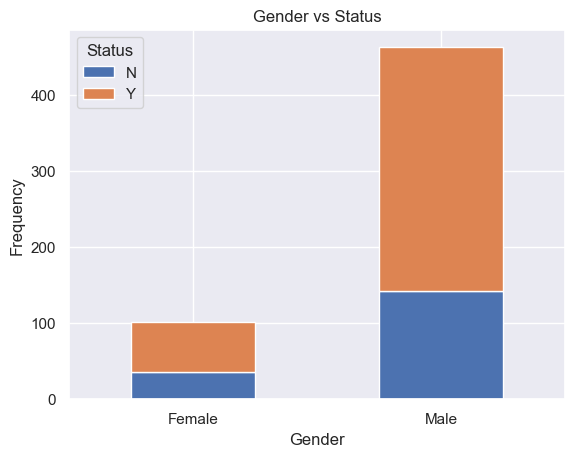

In [737]:
pd.crosstab(train.Gender, train.Status).plot(kind = "bar", stacked = True)
plt.title('Gender vs Status')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [738]:
males_count = train.loc[train['Gender'] == 'Male'].shape[0]
females_count = train.loc[train['Gender'] == 'Female'].shape[0]


males_paid_count = train.loc[(train['Gender'] == 'Male') & (train['Status'] == 'Y')].shape[0]
females_paid_count = train.loc[(train['Gender'] == 'Female') & (train['Status'] == 'Y')].shape[0]


print(f'{((males_paid_count / males_count) * 100) :.0f}% males are going to get approve for their loans')
print(f'{((females_paid_count / females_count) * 100) :.0f}% females are going to get approve for their loans')

69% males are going to get approve for their loans
64% females are going to get approve for their loans


##### From the previous plot and code we can see that Males are more likely to get approval for loans "by small percentage", and we can see from the plot that more 80% of customers are Males

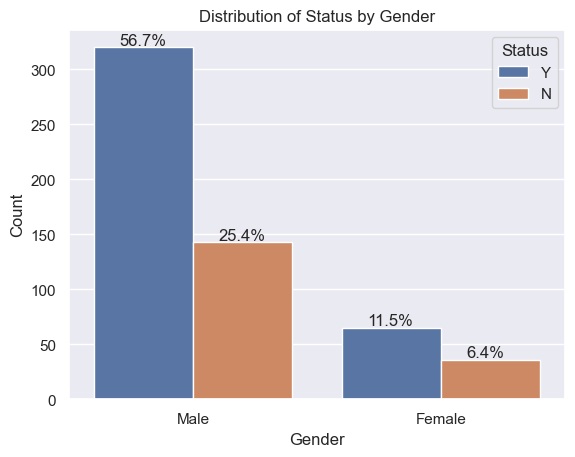

In [739]:
ax = sns.countplot(x=train['Gender'], hue=train['Status'], data=train)
plt.title('Distribution of Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format((height/total)*100), (p.get_x()+0.1, height+2))

# display the plot
plt.show()

In [740]:
married_count = train.loc[train['Married'] == 'Yes'].shape[0]
unmarried_count = train.loc[train['Married'] == 'No'].shape[0]


married_paid_count = train.loc[(train['Married'] == 'Yes') & (train['Status'] == 'Y')].shape[0]
unmarried_paid_count = train.loc[(train['Married'] == 'No') & (train['Status'] == 'Y')].shape[0]


print(f'Average of Married to get approve for loan is {((married_paid_count / married_count) * 100) :.2f}%')
print(f'Average of UnMarried to get approve for loan is {((unmarried_paid_count / unmarried_count) * 100) :.2f}%')

Average of Married to get approve for loan is 71.23%
Average of UnMarried to get approve for loan is 62.81%


#### People are married are more likely to ask for loans and more likely to get approval

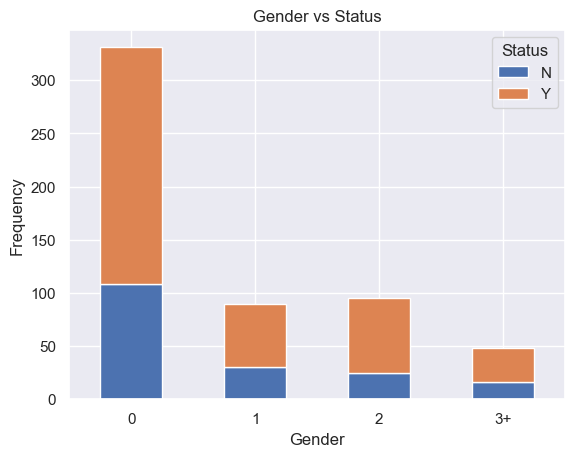

In [741]:
pd.crosstab(train.Dependents, train.Status).plot(kind = "bar", stacked = True)
plt.title('Gender vs Status')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

#### The number of dependents don't affect approving the loan that much, but people with less dependents are more likely to ask for loan

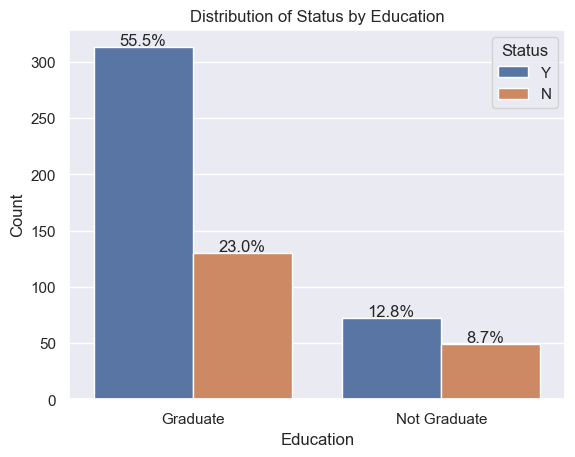

In [742]:
ax = sns.countplot(x=train['Education'], hue=train['Status'], data=train)
plt.title('Distribution of Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')

total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format((height/total)*100), (p.get_x()+0.1, height+2))

# display the plot
plt.show()

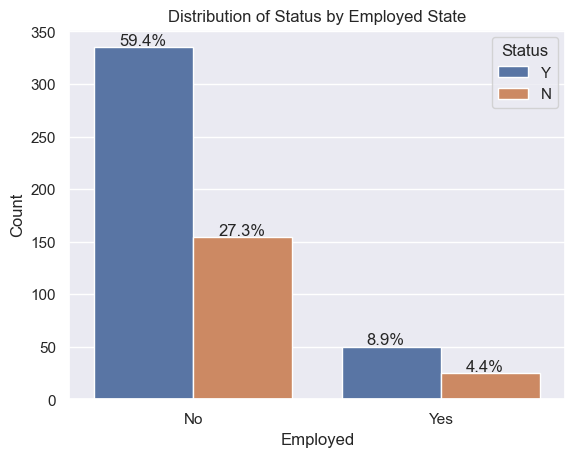

In [743]:
ax = sns.countplot(x=train['Self_Employed'], hue=train['Status'], data=train)
plt.title('Distribution of Status by Employed State')
plt.xlabel('Employed')
plt.ylabel('Count')

total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format((height/total)*100), (p.get_x()+0.1, height+2))

# display the plot
plt.show()

#### Graduates and UnEmployed are much more likely to ask for loan and have higher chance to get approval.

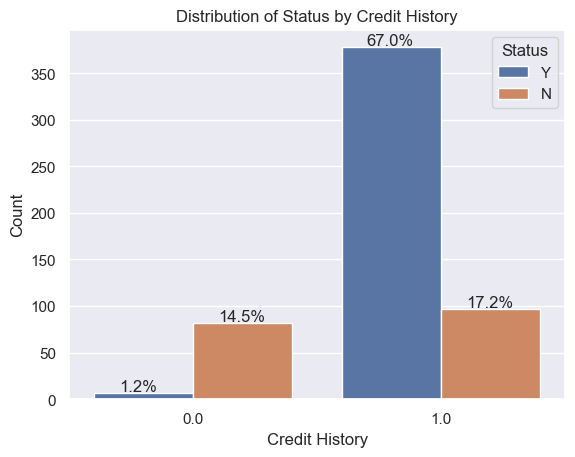

In [744]:
ax = sns.countplot(x=train['Credit_History'], hue=train['Status'], data=train)
plt.title('Distribution of Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')

total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format((height/total)*100), (p.get_x()+0.1, height+2))

# display the plot
plt.show()

#### Credit History have huge impact on the approval, and people with bad credit history less likely to come again

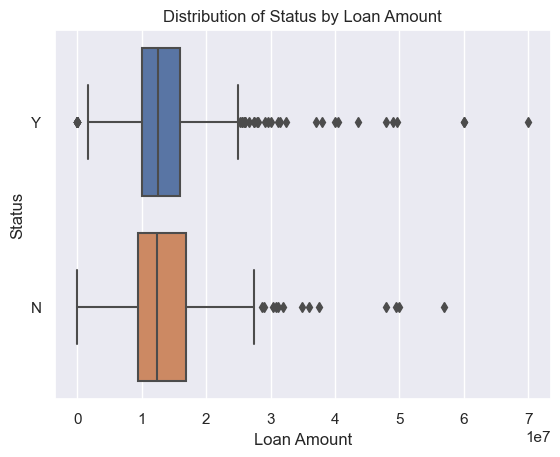

In [745]:
sns.boxplot(x=train['Loan_Amount'], y="Status", data=train)

plt.title('Distribution of Status by Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Status')

plt.show()

#### It's seems that loan amount doesn't have impact in the Status

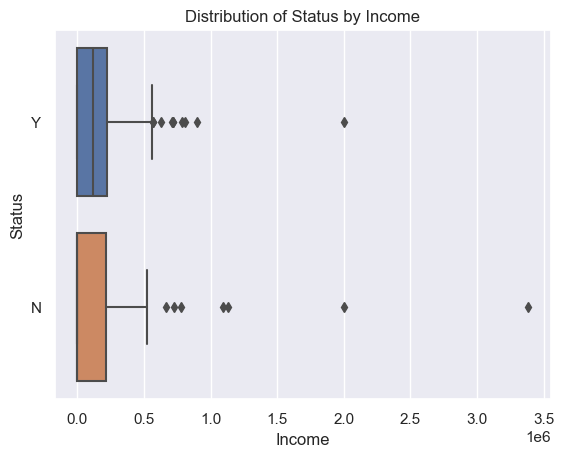

In [746]:
sns.boxplot(x=train['Coapplicant_Income'], y="Status", data=train)

plt.title('Distribution of Status by Income')
plt.xlabel('Income')
plt.ylabel('Status')

plt.show()

#### It doesn't have impact either we may  drop it 

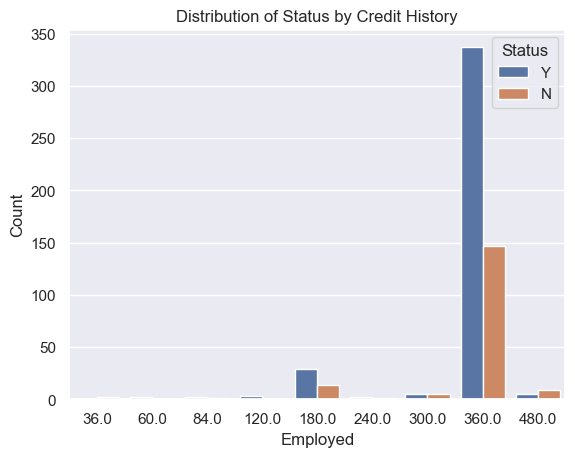

In [747]:
ax = sns.countplot(x=train['Term'], hue=train['Status'], data=train)
plt.title('Distribution of Status by Credit History')
plt.xlabel('Employed')
plt.ylabel('Count')

# display the plot
plt.show()

#### When the term is 480 the loan is more likely to get rejected

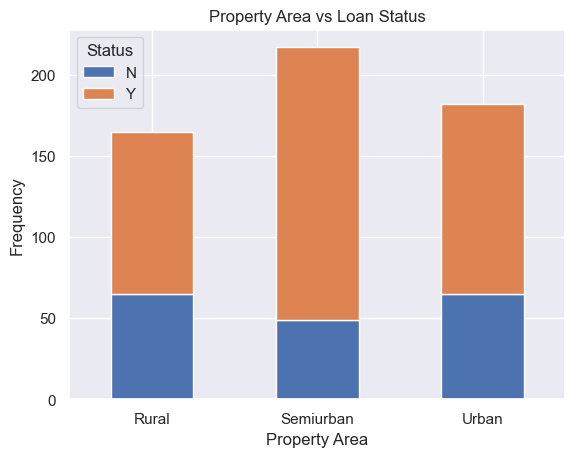

In [748]:
pd.crosstab(train.Area, train.Status).plot(kind = "bar", stacked = True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [749]:
count_urban = len(train[train.Area == 'Urban'])
count_rural = len(train[train.Area == 'Rural'])
count_semi_urban = len(train[train.Area == 'Semiurban'])

count_urban_approved = train.loc[(train.Area == 'Urban') & (train.Status == 'Y')].shape[0]
count_rural_approved = train.loc[(train.Area == 'Rural') & (train.Status == 'Y')].shape[0]
count_semi_approved = train.loc[(train.Area == 'Semiurban') & (train.Status == 'Y')].shape[0]


print(f'Percentage of Rural to get approved is {count_rural_approved / count_rural :.2f}')
print(f'Percentage of Urban to get approved is {count_urban_approved / count_urban :.2f}')
print(f'Percentage of SemiUrban to get approved is {count_semi_approved / count_semi_urban :.2f}')

Percentage of Rural to get approved is 0.61
Percentage of Urban to get approved is 0.64
Percentage of SemiUrban to get approved is 0.77


##### If you live in semiUrban area you have a high chance to get your loan approved, Urban have the second higher chance then in the end there is Rural

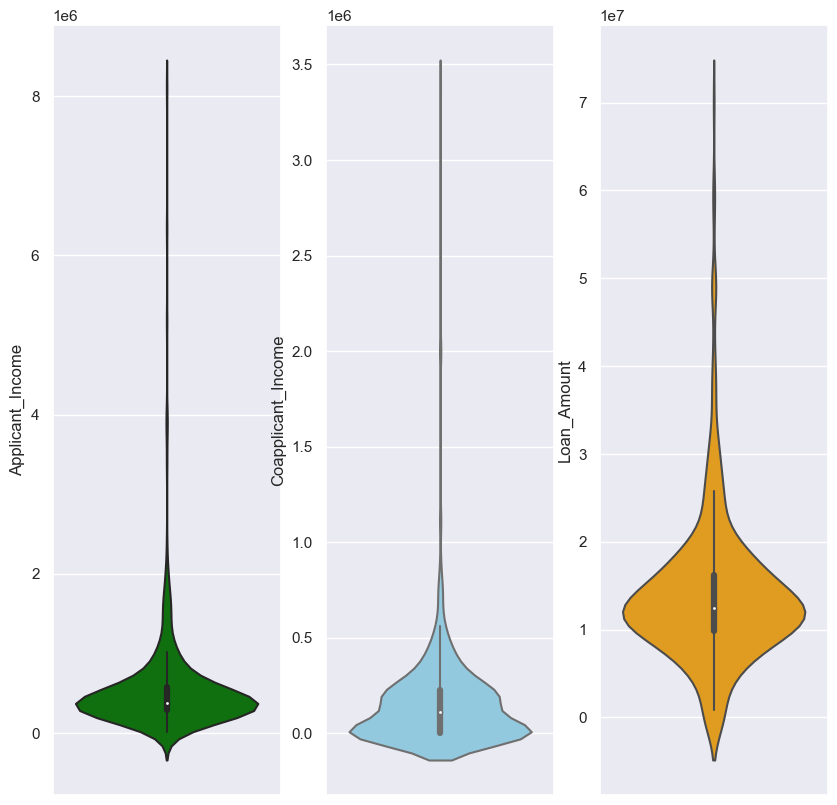

In [750]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(1, 3, figsize=(10, 10))
plt.subplot(1,3,1)
sns.violinplot(data = train, y = "Applicant_Income", color = 'green')
plt.subplot(1,3,2)
sns.violinplot(data = train, y = "Coapplicant_Income", color='skyblue')
plt.subplot(1,3,3)
sns.violinplot(data = train, y = "Loan_Amount", color='orange');

### After the Analysis we can see that Credit History have the highest correlation with  Status, 'Married', 'Graduate', 'Area', have a good affect of Status too.

# Data Preparing

In [751]:
train = pd.get_dummies(train)
train

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban,Status_N,Status_Y
0,584900,0.0,15000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,458300,150800.0,12800000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,300000,0.0,6600000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,258300,235800.0,12000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,600000,0.0,14100000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,290000,0.0,7100000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,410600,0.0,4000000,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,807200,24000.0,25300000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,758300,0.0,18700000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


#### Let's drop the paris columns

In [752]:
train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
            'Self_Employed_No', 'Status_N'], inplace=True, axis=1)

In [753]:
train.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban,Status_Y
0,584900,0.0,15000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,458300,150800.0,12800000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,300000,0.0,6600000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,258300,235800.0,12000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,600000,0.0,14100000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


In [754]:
new = { 'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
        'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
        'Loan_Status_Y': 'Loan_Status', 'Status_Y' : 'Status'}
train.rename(columns = new, inplace = True)

### Let's do the same with test

In [755]:
test = pd.get_dummies(test)

# Drop columns
test = test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
                  'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
        'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
        'Loan_Status_Y': 'Loan_Status',  'Status_Y' : 'Status'}
test.rename(columns = new, inplace = True)

In [756]:
test.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Area_Rural,Area_Semiurban,Area_Urban
0,572000,0,11000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
1,307600,150000,12600000,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1
2,500000,180000,20800000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1
4,327600,0,7800000,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1
5,216500,342200,15200000,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1


In [757]:
train.shape

(564, 17)

### Removing outliers

In [758]:
q1 = train.quantile(0.15)
q3 = train.quantile(0.85)
iqr = q3 - q1

train = train[~((train < (q1 - 1.5 * iqr)) |(train > (q3 + 1.5 * iqr))).any(axis = 1)]
train.shape

(372, 17)

### Normalizing

In [759]:
scaler = MinMaxScaler()

train['Applicant_Income'] = scaler.fit_transform(train['Applicant_Income'].values.reshape(-1,1))
train['Coapplicant_Income'] = scaler.fit_transform(train['Coapplicant_Income'].values.reshape(-1,1))
train['Loan_Amount'] = scaler.fit_transform(train['Loan_Amount'].values.reshape(-1,1))
train['Term'] = scaler.fit_transform(train['Term'].values.reshape(-1,1))

test['Applicant_Income'] = scaler.fit_transform(test['Applicant_Income'].values.reshape(-1,1))
test['Coapplicant_Income'] = scaler.fit_transform(test['Coapplicant_Income'].values.reshape(-1,1))
test['Loan_Amount'] = scaler.fit_transform(test['Loan_Amount'].values.reshape(-1,1))
test['Term'] = scaler.fit_transform(test['Term'].values.reshape(-1,1))

# Models

In [760]:
x = train.drop(['Status'], axis=1)
y = train['Status']


In [761]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

### Logistic Regression

In [762]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred_lr,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        26
           1       0.80      1.00      0.89        49

    accuracy                           0.84        75
   macro avg       0.90      0.77      0.80        75
weighted avg       0.87      0.84      0.82        75

[[14 12]
 [ 0 49]]
LR accuracy: 84.00%


### K-Nearest Neighbor (KNN)

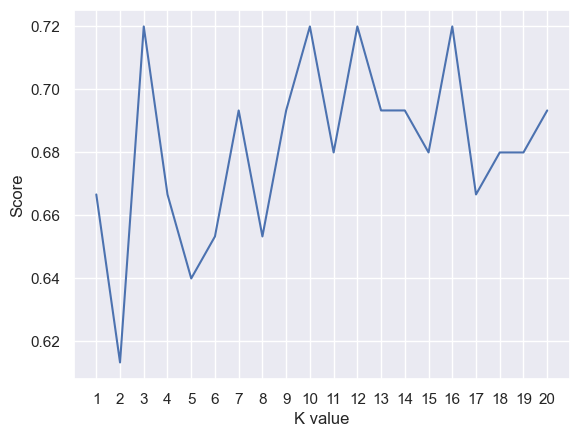

KNN best accuracy: 72.00%


In [763]:
from sklearn.neighbors import KNeighborsClassifier

score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score_knn.append(knn.score(x_test, y_test))
    
plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

### Support Vector Machine (SVM)


In [764]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', max_iter=500)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        26
           1       0.80      1.00      0.89        49

    accuracy                           0.84        75
   macro avg       0.90      0.77      0.80        75
weighted avg       0.87      0.84      0.82        75

[[14 12]
 [ 0 49]]
SVC accuracy: 84.00%


### Decision Tree

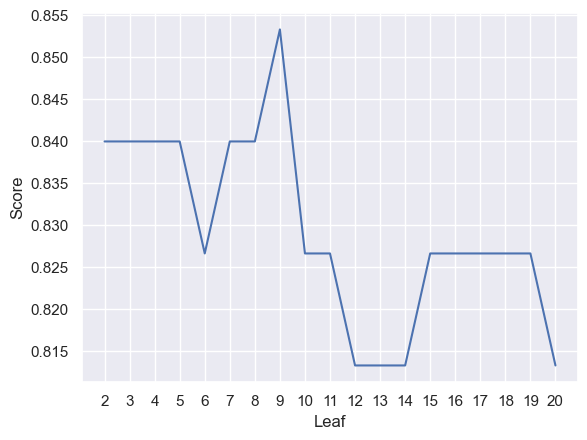

Decision Tree Accuracy: 85.33%


In [765]:
from sklearn.tree import DecisionTreeClassifier

score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc.fit(x_train, y_train)
    score_dt.append(dtc.score(x_test, y_test))
    
plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(score_dt)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

### Random Forest


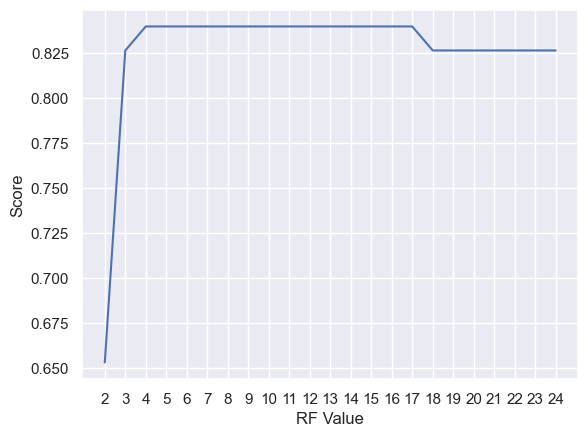

Random Forest Accuracy:  84.00%


In [766]:
from sklearn.ensemble import RandomForestClassifier

score_rf = []
for i in range(2,25):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rfc.fit(x_train, y_train)
    score_rf.append(rfc.score(x_test, y_test))
    
plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

#### Random Forest Fine Tuning 

In [767]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [768]:
from sklearn.model_selection import GridSearchCV
RFS = GridSearchCV(RandomForestClassifier(), random_grid, cv=10)
RFS.fit(x, y)

In [ ]:
RFS.best_score_

#### After finishing i didn't found the labels for the test data so that's it for this notebook ):